In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
type(mnist.train.images)

numpy.ndarray

In [6]:
sample = mnist.train.images[2].reshape(28,28)

In [9]:
import matplotlib.pyplot as plt

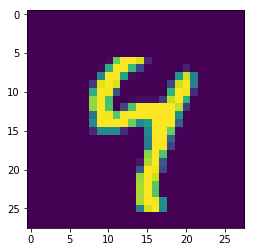

In [11]:
plt.imshow(sample)

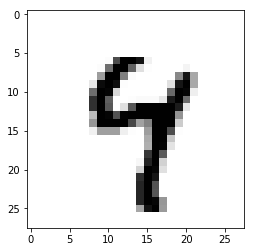

In [13]:
plt.imshow(sample,cmap = 'Greys')

In [14]:
learning_rate = 0.001
training_epochs = 30
batch_size = 100

In [15]:
n_classes = 10
n_sample = mnist.train.num_examples
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

In [16]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [17]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    # X*W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    #RELU(X* W + B)-> f(x)  = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [18]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [19]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [26]:
x = tf.placeholder('float',[None, n_input])
y = tf.placeholder('float',[None, n_classes])

In [28]:
pred = multilayer_perceptron(x, weights, biases)

In [32]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)